## Proj_01 : Finding Donors for *CharityML*
- Source : UdaCity, Machine Learning Intro, Supervided Learning

## Introduction 
In this project, I will employ several supervised algorithms to accurately model indivisuals' income using data collected from the 1944 U.S. Census.<br>
I will then chose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data.

## Goal
The goal of this project is to construct a model that accurately predicts whether an individual makes more than $50,000.

<a id="mokuji_0"></a>
## Contents
1. [Exploring the Dataset](#mokuji_1)<br>
  1-1. [Overview the data](#mokuji_1_1)<br>
  1-2. [Check invalid and missing data](#mokuji_1_2)<br>
  1-3. [Data exploration : income](#mokuji_1_3)<br>
  1-4. [Data exploration : numerical data](#mokuji_1_4)<br>
  1-5. [Data exploration : string data](#mokuji_1_5)<br>
  <br>
2. [Preprocessing the Dataset](#mokuji_2)<br>
  2-1. [Transformation : skewed continuous data](#mokuji_2_1)<br>
  2-2. [Normalization : numerical data](#mokuji_2_2)<br>
  2-3. [Normalization : non-numerical data](#mokuji_2_3)<br>
  2-4. [Shuffle and Split Data](#mokuji_2_4)<br>
  <br>
3. [Modeling](#mokuji_3)<br>
  3-1. [Metrics](#mokuji_3_1)<br>
  3-2. [Recap of Metrics](#mokuji_3_2)<br>
  3-3. [Naive Predictor Performace](#mokuji_3_3)<br>
  3-4. [Select Supervised Learning Models](#mokuji_3_4)<br>
  3-5. [Create a training and predicting pipeline](#mokuji_3_5)<br>
  3-6. [Initial Model Evaluation](#mokuji_3_6)<br>
  3-7. [Chose the Best Model](#mokuji_3_7)<br>
  3-8. [Model Tuning](#mokuji_3_8)<br>
  <br>
4. [Evaluation](#mokuji_4)<br>
  4-1. [Final Model Evaluation](#mokuji_4_1)<br>
  4-2. [Feature Importance](#mokuji_4_2)<br>


<a id="mokuji_1"></a>
## [1. Exploring the Dataset](#mokuji_0)

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # this allows the use of display() for DataFrames
# import visuals as vs #
import matplotlib.pyplot as pl
%matplotlib inline

<a id="mokuji_1_1"></a>
### [1-1. Overview the data](#mokuji_0)
- The dataset for this project originates from the 
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income).
- From the table below, I found that there are numerical and string features.

In [2]:
# Load the Census dataset
data = pd.read_csv("./Data/Proj_01/census.csv")

# Display the first 5 records
display(data.head(5))

# Display the unique income values
print("The unique values of INCOME")
display(data["income"].unique())

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


The unique values of INCOME


array(['<=50K', '>50K'], dtype=object)

<a id="mokuji_1_2"></a>
### [1-2. Check invalid and missing data](#mokuji_0)
- There are no invalid data.

In [3]:
data.isnull().sum(axis=0)

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<a id="mokuji_1_3"></a>
### [1-3. Data exploration : income](#mokuji_0)

A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. <br>
In the code cell below, I will compute the following:

- The total number of records : `n_records`  
- The number of individuals making more than \$50,000 annually `n_greater_50k` 
- The number of individuals making at most \$50,000 annually : `n_at_most_50k` 
- The percentage of individuals making more than \$50,000 annually : `greater_percent`  

In [4]:
n_records       = data.shape[0]
n_greater_50k   = (data["income"] == ">50K" ).sum()
n_at_most_50k   = (data["income"] == "<=50K").sum()
greater_percent = n_greater_50k / n_records * 100

# Print results
print("Total number of records                                        : {}".format(n_records))
print("The number of individuals making more than $50,000 annually    : {}".format(n_greater_50k))
print("The number of individuals making at most $50,000 annually      : {}".format(n_at_most_50k))
print("The percentage of individuals making more than $50,000 annually: {0:5.1f} %".format(greater_percent))

Total number of records                                        : 45222
The number of individuals making more than $50,000 annually    : 11208
The number of individuals making at most $50,000 annually      : 34014
The percentage of individuals making more than $50,000 annually:  24.8 %


<a id="mokuji_1_4"></a>
### [1-4. Data exploration : numerical data](#mokuji_0)
- From the table and the graph below, `capital-gain` and `capital-loss` are highly skewed. 
- So, some transformation are needed for those features.

In [5]:
col_names_numerical = ["age", "education-num", "capital-gain", "capital-loss", "hours-per-week"]
data_numerical      = data.loc[:, col_names_numerical]
data_numerical.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,38.547941,10.118460,1101.430344,88.595418,40.938017
std,13.217870,2.552881,7506.430084,404.956092,12.007508
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
def plot_hist(df, col_names, plot_row_num=2, plot_col_num=3, y_limit=(0,2000)):
    # create figure
    fig = pl.figure(figsize = (11,5));
    
    # plot in bin
    for i, feature in enumerate(col_names):
        ax = fig.add_subplot(plot_row_num, plot_col_num, i+1)
        ax.hist(df[feature], bins=25)
        ax.set_title("'%s' distribution"%(feature), fontsize=14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")
        ax.set_ylim(y_limit)
    #
    fig.tight_layout()

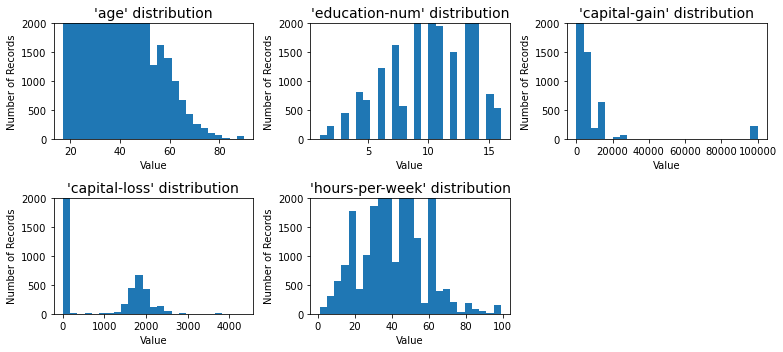

In [7]:
#plot_hist(data, ["capital-gain", "capital-loss"])
plot_hist(data, col_names_numerical)

<a id="mokuji_1_5"></a>
### [1-5. Data exploration : string data(other than `income`)](#mokuji_0)
- I show the unique values of string data.
- A conversion from string to numerical data is needed.

In [8]:
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_rows', 150)
col_names_string = set(data.columns) ^ set(col_names_numerical) ^ set(["income"])

for i, col_name in enumerate(col_names_string):
    print("--------------------------")
    unique_names = data[col_name].unique()
    output_name  = ""
    print("{}. [{}] : unique value num = {}".format(i, col_name, len(unique_names)))
    #
    for j, unique_name in enumerate(unique_names):
        if j == 0:
            output_name = unique_name
        else:
            output_name = output_name + ", " + unique_name

    print(output_name)

--------------------------
0. [relationship] : unique value num = 6
 Not-in-family,  Husband,  Wife,  Own-child,  Unmarried,  Other-relative
--------------------------
1. [workclass] : unique value num = 7
 State-gov,  Self-emp-not-inc,  Private,  Federal-gov,  Local-gov,  Self-emp-inc,  Without-pay
--------------------------
2. [native-country] : unique value num = 41
 United-States,  Cuba,  Jamaica,  India,  Mexico,  Puerto-Rico,  Honduras,  England,  Canada,  Germany,  Iran,  Philippines,  Poland,  Columbia,  Cambodia,  Thailand,  Ecuador,  Laos,  Taiwan,  Haiti,  Portugal,  Dominican-Republic,  El-Salvador,  France,  Guatemala,  Italy,  China,  South,  Japan,  Yugoslavia,  Peru,  Outlying-US(Guam-USVI-etc),  Scotland,  Trinadad&Tobago,  Greece,  Nicaragua,  Vietnam,  Hong,  Ireland,  Hungary,  Holand-Netherlands
--------------------------
3. [education_level] : unique value num = 16
 Bachelors,  HS-grad,  11th,  Masters,  9th,  Some-college,  Assoc-acdm,  7th-8th,  Doctorate,  Asso

<a id="mokuji_2"></a>
## [2. Preprocessing the Dataset](#mokuji_0)

- Fortunately, for this dataset, there are no invalid or missing entries we must deal with.
- However, there are some qualities about certain features that must be adjusted.
- This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

In [9]:
# Split the dataset into "target label" and "features"
income_raw  = data["income"]
features_raw = data.drop("income", axis=1) 

<a id="mokuji_2_1"></a>
### [2-1. Transformation : skewed continuous data](#mokuji_0)
- Algorithms can be sensitive hightly skewed feature distribution such as `capital-gain` and `capital-loss`, 
  and underperform if the range is not properly normalized.
- I will apply [logarithmic transformation](https://en.wikipedia.org/wiki/Data_transformation_(statistics)) on the data,
  so that the very large and very small values do not genatively affect the performance of a learning algorithm.
- Using a logarithmic transformation significantly reduces the range of values caused by outliers.
  - The logarighm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the logarithm successfully.

In [10]:
col_names_skewed = ["capital-gain", "capital-loss"]
features_log_transformed = pd.DataFrame(data=features_raw)
features_log_transformed[col_names_skewed] = features_raw[col_names_skewed].apply(lambda x: np.log(x+1))

,capital-gain,capital-loss
count,45222.000000,45222.000000
mean,0.740759,0.355489
std,2.466527,1.595914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,11.512925,8.379539


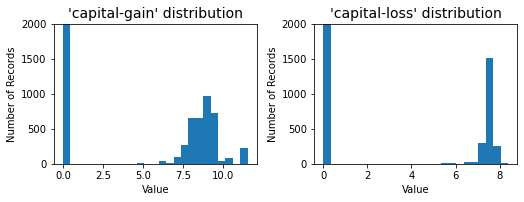

In [11]:
# Visualize the transformed features
display(features_log_transformed[col_names_skewed].describe())
plot_hist(features_log_transformed, col_names_skewed)

- From the table above, the data range becomes smaller.
  - `capital-gain` :  **99999.0** --> **11.5**
  - `capital-loss` :  **4356.0**  -->  **8.3**

<a id="mokuji_2_2"></a>
### [2-2. Normalization : numerical data](#mokuji_0)
- Normalization enusures that each feature is treated equally when applying supervised learners.
- I will use `sklearn.preprocessing.MinMaxScaler` for this.

In [12]:
# Import sklearn.preprocessing.MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler, then apply it to the features
scaler = MinMaxScaler((0, 1))
features_log_minmax_transform = pd.DataFrame(data=features_log_transformed)
features_log_minmax_transform[col_names_numerical] = scaler.fit_transform(features_log_transformed[col_names_numerical])

# Show results
display(features_log_minmax_transform[col_names_numerical].describe())

,age,education-num,capital-gain,capital-loss,hours-per-week
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,0.295177,0.607897,0.064342,0.042423,0.407531
std,0.181067,0.170192,0.214240,0.190454,0.122526
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.600000,0.000000,0.000000,0.397959
75%,0.410959,0.800000,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000


<a id="mokuji_2_3"></a>
### [2-3. Normalization : non-numerical data](#mokuji_0)
- There are several features for each record that are non-numeric.
- Typically, learning algorithms expect input to be numeric.
- I will use `one-hot encoding` to convert categorical features.
  - `One-hot encoding` creates a **dummy** cariable for each possible category of each non-numerical feature.
  - For exapmle, assume `someFeature` has three possible entiries: `A`, `B` or `C`.
  - We then endode this feature into `someFeatureA`, `someFeatureB` and `someFeatureC`.
- I will use `pandas.get_dummies()` to perform `one-hot encoding` on the `feature_log_minmax_transform` data.

|   | someFeature |                    | someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: |                            | :-: | :-: | :-: |
| 0 |  B  |  | 0 | 1 | 0 |
| 1 |  C  | ----> one-hot encode ----> | 0 | 0 | 1 |
| 2 |  A  |  | 1 | 0 | 0 |

- Additionally, I will convert the non-numerical target label `income` to numerical values.
- Since there are only two possible categories for this label(`<=50K` and `>50K`), we can avoid using `one-hot encoding`
  and simply encode these two categories as `0` and `1`.
  - I set records with `<=50K` to `0` and record with `>50K` to `1`.

In [13]:
# One-hot encoding : features
features_final = pd.get_dummies(features_log_minmax_transform)
display(features_final.describe())

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_level_ 10th,education_level_ 11th,education_level_ 12th,education_level_ 1st-4th,education_level_ 5th-6th,education_level_ 7th-8th,education_level_ 9th,education_level_ Assoc-acdm,education_level_ Assoc-voc,education_level_ Bachelors,education_level_ Doctorate,education_level_ HS-grad,education_level_ Masters,education_level_ Preschool,education_level_ Prof-school,education_level_ Some-college,marital-status_ Divorced,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,...,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_ Cambodia,native-country_ Canada,native-country_ China,native-country_ Columbia,native-country_ Cuba,native-country_ Dominican-Republic,native-country_ Ecuador,native-country_ El-Salvador,native-country_ England,native-country_ France,native-country_ Germany,native-country_ Greece,native-country_ Guatemala,native-country_ Haiti,native-country_ Holand-Netherlands,native-country_ Honduras,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
count,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.00000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,...,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000,45222.000000
mean,0.295177,0.607897,0.064342,0.042423,0.407531,0.031091,0.068551,0.736522,0.036398,0.083941,0.043032,0.000464,0.027044,0.035801,0.012759,0.004909,0.009929,0.018199,0.014948,0.033324,0.043320,0.167396,0.012030,0.326898,0.055592,0.001592,0.017359,0.218898,0.139246,0.00070

In [14]:
# One-hot encoding : target label
income = income_raw.map({"<=50K":0, ">50K":1})
display(income.describe())

count    45222.000000
mean         0.247844
std          0.431766
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: income, dtype: float64

<a id="mokuji_2_4"></a>
### [2-4. Shuffle and Split Data](#mokuji_0)
Now all *categorical features* have been converted into numerical features, and all numerical features have been normalized.
As always, I will now split the data into `training` and `test` sets.<br>
80% of the data will be used for trainging and 20% for testing.

In [15]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Spline the features and the label into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features_final, income, test_size = 0.2, random_state=0)

# Show resutls
print("Training set has {} samples.".format(x_train.shape[0]))
print("Testing  set has {} samples.".format(x_test.shape[0]))

Training set has 36177 samples.
Testing  set has 9045 samples.


<a id="mokuji_3"></a>
## [3. Modeling](#mokuji_0)

In this section, I will investigate four different algorithms and determine which is best at modeling the data. 
Three of these algorithms will be supervised learners, and the fourth algorithm is known as a `naive predictor`.

<a id="mokuji_3_1"></a>
## [3-1. Metrics](#mokuji_0)

*CharityML*, equipped with theire research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately.<br>
It would seem that using **accuracy** as a metric for evaluating a particular model's performance would be appropriate.<br>
Additionally, identifying someone that does not make more than \$50,000 as someone who does would be detrimental to *CharityML*,
since they are looking to find individuals willing to donate.<br>
Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to recall those individuals.<br>
I can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the $F_{0.5}score$ or (F-score for simplicity).

$$ F_{1} = (1 + 1^2) \cdot \frac{precision \cdot recall}{\left( 1^2 \cdot precision \right) + recall} 
         = \frac{2 \cdot precision \cdot recall}{precision + recall}$$
         
$$ F_{0} = (1 + 0^2) \cdot \frac{precision \cdot recall}{\left( 0^2 \cdot precision \right) + recall} 
         = precision$$         

<a id="mokuji_3_2"></a>
## [3-2. Recap of Metrics](#mokuji_0)



<table>
	<tbody>
		<tr>
			<td colspan="2" rowspan="2"></td>
			<th colspan="2">Prediction Value</th>
		</tr>
		<tr>
			<th>Yes</th>
			<th>No</th>
		</tr>
		<tr>
			<th rowspan="2">Answer Value</th>
			<th>Yes</th>
			<td>TP: True Positive</td>
			<td>FN: False Negative</td>
		</tr>
		<tr>
			<th>No</th>
			<td>FP: False Positive</td>
			<td>TN: True Negative</td>
		</tr>
	</tbody>
</table>

### Accuracy
- Accurach = TP / ( TP + FP + TN + FN)
- Accracy mesures how often the classifier make the correct prediction.
- It's the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

### Precision
- Precision = TP / ( TP + FP)
- Precision tells us what proportion of messages we classified as spam , actually were spam.
- It is a ratio of true positives to all positives.
- If we want to reduce the ration of FP, we ues precision.
- e.g.
  - true positives : words classified as spam, and which are accually spam
  - all positives  : all words classified as spam, irrespective of whether that was the correct classification
  
### Recall (sensitivity)
- Recall = TP / ( TP + FN)
- Recall tells us what proportion of messages that actually were spam were classified by us as spam.
- It is a ration of true positives to all the words that were actually spam.
- If we want to reduce the ration of FN, we use recall. (e.g. cancer detection)

<a id="mokuji_3_3"></a>
## [3-3. Naive Predictor Performace](#mokuji_0)

- I create a naive predictor which always predicts `1` (i.e. the individuals makes more than 50k).
- I will evaluate this model's accuracy and F-score.
- The purpose of generating a native predictor is simply to show what a base model without any intelligence would look like.
- This model will have no TN(true negative) or FN(false negative).

In [16]:
TP = np.sum(income)
FP = income.shape[0] - TP
TN = 0
FN = 0
#
accuracy  = TP / (TP+FP+TN+FN)
precision = TP / (TP+FP)
recall    = TP / (TP+FN)
beta      = 0.5
fscore    = (1+beta**2)*(precision*recall)/(beta**2*precision+recall)

# Show Results
print("Naive Predictor Performance")
print("   Accuracy = {:.4f}".format(accuracy))
print("   F-score  = {:.4f}".format(fscore))


Naive Predictor Performance
   Accuracy = 0.2478
   F-score  = 0.2917


<a id="mokuji_3_4"></a>
## [3-4. Select Supervised Learning Models](#mokuji_0)

I choose three models which are appropriate for this model. I will explain the reasons about the four points below.

1. Describe one real-world application in industry where the model can be applied.
2. What are the strengths of the model; when does it perform well?
3. What are the weaknesses of the model; when does it perform poorly?
4. What makes this model a good candidate for the problem, given what you know about the data?

<h3>1:Gaussian Naive Bayes</h3>
<ol>
<li>Real time forecast of stock prices</li>
<li>Training time and prediction time are small. We use it when features are independent.</li>
<li>When features are not independent, accuracy will become bad.</li>
<li>For 1st trial, I use this. I want to find quickly whether features are independent.</li>    
</ol>

<h3>2:Decision Tree</h3>
<ol>
<li>Optimization of the arrangement of workers according to the weather forecast</li>
<li>By using this, we can easily visualize the result.</li>
<li>This tends to overfit the data.</li>
<li>To get good understanding of the data visually.</li>    
</ol>

<h3>3:AdaBoost</h3>
<ol>
<li>classification of image data</li>
<li>To get better accuracy, this method can select the features which mostly contribute to the true prediction.</li>
<li>This tends to overfit the data.</li>
<li>To use this, we can find the necessary features, so we will be able to do better preprocessings.</li>    
</ol>


<a id="mokuji_3_5"></a>
## [3-5. Create a Training and Predicting Pipeline](#mokuji_0)

To properly evaluate the performance of each model you've chosen, it's important that I create a training and predicting pipeline that allows me to quickly and effectively train models using various sizes of training data and perform predictions on the testing data.

I will implement the following:
- Import `fbeta_score` and `accuracy_score` from `sklearn.metrics`
- Fit the learner to the sampled training data and record the training time.
- Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`
  - Record the total prediction time.
- Calculate the accuracy score for both the training subset and testing subset
- Calculate the F-score for both the training subset and testing subset

In [17]:
from sklearn.metrics import fbeta_score, accuracy_score

def train_and_predict(learner, sample_size, x_train, y_train, x_test, y_test):
    '''
    inputs:
      - learner     : the learning algorithm to be trained and predicted on
      - sample_size : the size of samples (number) to be drawn from training set
      - x_train     : features training set
      - y_train     : income training set
      - x_test      : features testing set
      - y_test      : income testing set
    '''
    
    results = {}
    
    # Training
    t_start = time()
    learner = learner.fit(x_train.iloc[:sample_size, :], y_train.iloc[:sample_size])
    t_end   = time()
    results['train_time'] = t_end - t_start
    
    # Prediction
    t_start = time()
    predictions_train = learner.predict(x_train.iloc[:300]) 
    predictions_test  = learner.predict(x_test)
    t_end   = time()
    results['pred_time'] = t_end - t_start
    beta = 0.5
    
    # Evaluation : train
    results['train_acc'] = accuracy_score(y_train[:300], predictions_train[:300])
    results['train_f']   = fbeta_score(   y_train[:300], predictions_train[:300], beta=beta)
    
    # Evaluation : test
    results['test_acc'] = accuracy_score(y_test, predictions_test)
    results['test_f']   = fbeta_score(   y_test, predictions_test, beta=beta)
    
    return results

I implement a plot function to evaluate.

In [18]:
import matplotlib.patches as mpatches

def plot_evaluate(results, bar_width=0.3, figsize=(11,7)):
    """
    Visualization code to display results of learners.
    
    inputs:
      - results: a map. results[model_name][sample_num_id][metric]
    """
    
    # Create a figure
    fig, ax = pl.subplots(2,3,figsize=figsize)
    
    # Parameters
    model_colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", \
                    "tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
    metric_names = ["train_time", "train_acc", "train_f", "pred_time", "test_acc", "test_f"]
    ylabels      = ["Time[s]",    "Accuracy",  "F-score", "Time[s]",   "Accuracy", "F-score"]
    titles       = ["Training:Time", "Training:Accuracy", "Training:F-score", "Pred:Time", "Pred:Accuracy", "Pred:F-score"]
    model_names  = results.keys()
    num_sampling_type = 3;
    #
    # Loops for bar plot
    for model_id, model_name in enumerate(model_names):
        model_color = model_colors[model_id]
        #
        for metric_id, metric_name in enumerate(metric_names):
            plot_row = metric_id // 3 #//len(model_names); # shou
            plot_col = metric_id %  3 #len(model_names); # amari
            tmp_ax   = ax[plot_row, plot_col]
            #
            for sample_id in range(num_sampling_type):
                x = sample_id + model_id * bar_width;
                y = results[model_name][sample_id][metric_name]
                #
                tmp_ax.bar(x,y, width=bar_width, color=model_color)
                #
                tmp_ax.set_xticks([0.45, 1.45, 2.45])
                tmp_ax.set_xticklabels(["1%", "10%", "100%"])
                tmp_ax.set_xlabel("Training Set Size")
                tmp_ax.set_xlim((-0.1, 3.0))
                tmp_ax.set_title(titles[metric_id])
                tmp_ax.set_ylabel(ylabels[metric_id])
                #
            # end of [for sample_id]
        # end of [for metric_id]
    # end of [for model_id]
                    
    # Create patches for the legend
    patches = []
    for model_id, model_name in enumerate(model_names):
        patches.append(mpatches.Patch(color=model_colors[model_id], label=model_name))
    #
    pl.legend(handles=patches, bbox_to_anchor=(1.05, 2.0), loc='upper left', \
              borderaxespad = 0.0, ncol = 1, fontsize = 'x-large')
    
    # To avoid overlapping xlabel and title
    fig.subplots_adjust(wspace=0.5, hspace=0.3)      

<a id="mokuji_3_6"></a>
## [3-6. Initial Model Evaluation](#mokuji_0)

I will implement the following:
- Import the three supervised learning models which I have discussed in the previous section.
- Initialize the three models
  - I will use the default settings for each model. I will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10% and 100% of the training data.

In [19]:
# Import models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree        import DecisionTreeClassifier
from sklearn.ensemble    import AdaBoostClassifier

# Initialize the three models
models = [GaussianNB(), DecisionTreeClassifier(random_state=0), AdaBoostClassifier(random_state=0)]

# list of number of sample
sample_list = [int(len(y_train)/100), int(len(y_train)/10), int(len(y_train))]

# Train models and Predict results
results = {}
#
for model in models:
    model_name = model.__class__.__name__
    results[model_name] = {}
    #
    for i, sample_size in enumerate(sample_list):
        t_start = time()
        results[model_name][i] = train_and_predict(model, sample_size, x_train, y_train, x_test, y_test)
        t_end   = time()
        print("{}[{}] : {:.3f}[s]".format(model_name, i, (t_end-t_start)))
print("Finish !")

GaussianNB[0] : 0.018[s]
GaussianNB[1] : 0.022[s]
GaussianNB[2] : 0.061[s]
DecisionTreeClassifier[0] : 0.012[s]
DecisionTreeClassifier[1] : 0.025[s]
DecisionTreeClassifier[2] : 0.230[s]
AdaBoostClassifier[0] : 0.154[s]
AdaBoostClassifier[1] : 0.282[s]
AdaBoostClassifier[2] : 1.572[s]
Finish !


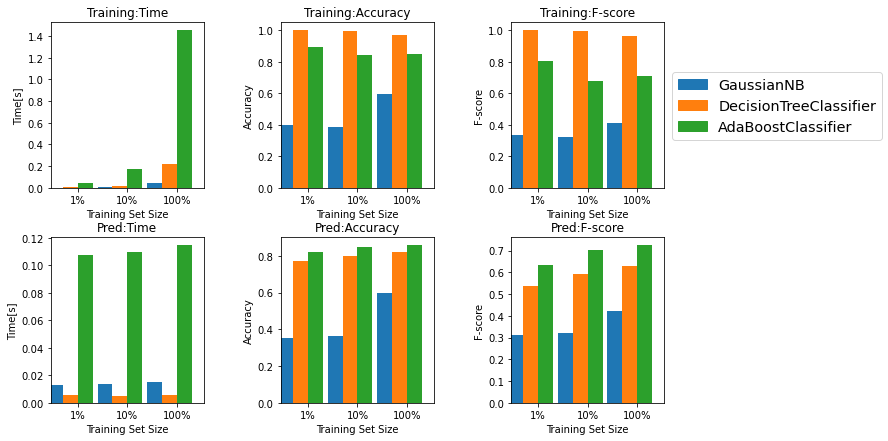

In [20]:
plot_evaluate(results)

In [21]:
def show_results_table(results):
    df_results = []
    model_names = results.keys()
    for i, model_name in enumerate(model_names):
        df_results.append( pd.DataFrame(results[model_name]) )
        df_results[i].columns = [ model_name[:5]+"_1", model_name[:5]+"_10", model_name[:5]+"_100"]
        #
        print("---------------------------------------------------")
        print(df_results[i])  
    #
    return df_results

In [22]:
show_results_table(results);

---------------------------------------------------
             Gauss_1  Gauss_10  Gauss_100
train_time  0.000997  0.004986   0.042894
pred_time   0.012992  0.013963   0.014925
train_acc   0.400000  0.383333   0.593333
train_f     0.333333  0.325092   0.412500
test_acc    0.351797  0.366059   0.597678
test_f      0.310134  0.320258   0.420899
---------------------------------------------------
             Decis_1  Decis_10  Decis_100
train_time  0.003000  0.016954   0.222430
pred_time   0.005976  0.004987   0.005984
train_acc   1.000000  0.996667   0.970000
train_f     1.000000  0.997191   0.963855
test_acc    0.771918  0.801658   0.818242
test_f      0.535978  0.593875   0.627250
---------------------------------------------------
             AdaBo_1  AdaBo_10  AdaBo_100
train_time  0.042885  0.170514   1.454104
pred_time   0.107713  0.109737   0.114668
train_acc   0.893333  0.840000   0.850000
train_f     0.801282  0.680147   0.711538
test_acc    0.820674  0.849862   0.857601
test

<a id="mokuji_3_7"></a>
## [3-7. Chose the Best Model](#mokuji_0)

From the table above, I select the `Adaboost` mode.
- F-score using 100% of traning data(colum=`AdaBo_100` , row=`test_f`) is the best. 
- Both of the training and prediction time are small enough.
- From the value of F-score(train_f and test_f), the result of `AdaBoost` did not overfit.

<a id="mokuji_3_8"></a>
## [3-8. Model Tuning](#mokuji_0)

I will fine tune the chosen model using gird search(`GridSearchCV`).<br>
I will implement the following:
- Import `sklearn.grid_search.GridSearchCV` and `sklearn.metrics.make_scorer`.
- Initialize the classifier which I've chosen and store it in `base_model`.
- Create a dictionary of parameters I wich to tune for the chosen model.
- Use `make_scorer` to create an `fbeta_score` scoring object(with $\beta$=0.5)
- Perform grid search on the classifier `base_model` using the `scorer` and store it in `grid_obj`.
- Fit the grid search object to the training data(`x_train`, `y_train`), and store it in `grid_fit`

In [23]:
import os
import pickle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import make_scorer, f1_score, fbeta_score

# Initialize my model
base_model = AdaBoostClassifier(random_state=0)

file_name_best_model = './Data/Proj_01/best_model.sav'

if os.path.isfile(file_name_best_model):
    print("Load the best model from a file")
    # If there is already a file which contains the best model, load it.
    best_model = pickle.load(open(file_name_best_model, 'rb'))
    
else:
    print("Train the model with grid search to get the best model")
    # Paremter settings
    params = {}
    params['base_estimator'] = [DecisionTreeClassifier(random_state=0, max_depth=x) for x in [1,2,3,4,5]] # default = 1
    params['n_estimators']   = [50, 100, 200, 400] # default = 50
    params['learning_rate']  = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1] # default = 1.0

    # Grid search and Cross Validation
    scorer     = make_scorer(fbeta_score, beta=0.5)
    grid_obj   = GridSearchCV(base_model, params, scoring=scorer)
    grid_fit   = grid_obj.fit(x_train, y_train)
    best_model = grid_fit.best_estimator_
    
    # save the model to a file
    pickle.dump(best_model, open(file_name_best_model, 'wb'))

Load the best model from a file


- I show the score

In [24]:
pred_base = (base_model.fit(x_train, y_train)).predict(x_test)
pred_best = best_model.predict(x_test)
#
# Report the before-and-afterscores
print("------ Unoptimized model ------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, pred_base)))
print("F-score on testing data:        {:.4f}".format(fbeta_score(y_test, pred_base, beta = 0.5)))
#
print("------ Optimized model ------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, pred_best)))
print("Final F-score on the testing data:        {:.4f}".format(fbeta_score(y_test, pred_best, beta = 0.5)))

------ Unoptimized model ------
Accuracy score on testing data: 0.8576
F-score on testing data:        0.7246
------ Optimized model ------
Final accuracy score on the testing data: 0.8690
Final F-score on the testing data:        0.7489


- These are parameter of the `best_model`.

In [25]:
best_model.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator__ccp_alpha': 0.0,
 'base_estimator__class_weight': None,
 'base_estimator__criterion': 'gini',
 'base_estimator__max_depth': 2,
 'base_estimator__max_features': None,
 'base_estimator__max_leaf_nodes': None,
 'base_estimator__min_impurity_decrease': 0.0,
 'base_estimator__min_samples_leaf': 1,
 'base_estimator__min_samples_split': 2,
 'base_estimator__min_weight_fraction_leaf': 0.0,
 'base_estimator__random_state': 0,
 'base_estimator__splitter': 'best',
 'base_estimator': DecisionTreeClassifier(max_depth=2, random_state=0),
 'learning_rate': 0.5,
 'n_estimators': 100,
 'random_state': 0}

<a id="mokuji_4"></a>
## [4. Evaluation](#mokuji_0)




<a id="mokuji_4_1"></a>
## [4-1. Final Model Evaluation](#mokuji_0)

I show the results.

|     Metric     | Naive Predictor   | Unoptimized AdaBoost | Optimized AdaBoost |
| :------------: | :---------------: | :-------------:      | :-------------:    |
| Accuracy Score |  0.2478           |  0.8576              | 0.8690             |
| F-score        |  0.2917           |  0.7246              | 0.7489             |

Compaired to the `Navive Predictor`,  the performance of the `Optimized Model` is improved by 62.1%.<br>
Compaired to the `Unoptimized Model`, the performance of the `Optimized Model` is improved by  2.4%.


<a id="mokuji_4_2"></a>
## [4-2. Feature Importance](#mokuji_0)

An important task when performing supervised learning on a dataset like the census data is determining which features provide the most predictive power.

By focusing on the relationship between only a few crucial features and the target label, I can simplify our understanding of the phenomenon, which is most always a useful thing to do.

In the case of this project, that means I wish to identify a small number of features that most strongly predict whether an indivisual makes at most or more than \$50,000.

Some scikit-learn classifiers(e.g., adaboost, random forests) have a `feature_importance_` attributee, which is a function that ranks the importance of features.
In the code cell below, I will use this attribute to determin the top X most important features for the census dataset.

In [26]:
# This is a plot function which display the top X most important features
def plot_features(importances, x_train, y_train, top_x, figsize=(15,5)):
    # Get Top X most important features
    indices = np.argsort(importances)[::-1]
    columns = x_train.columns.values[indices[:top_x]]
    weights = importances[indices][:top_x]
    
    # Create Figure
    bar_x1 = np.arange(top_x) - 0.3
    bar_x2 = np.arange(top_x)
    bar_y1 = weights
    bar_y2 = np.cumsum(weights)
    #
    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
    labels = ["Feature Weight", "Cumulative Feature Weight"]
    fig    = pl.figure(figsize=figsize)
    pl.title("Normalized Wieghts for Frist Five Most Predictive Features", fontsize=16)
    
    # Plot Bar
    pl.bar(bar_x1, bar_y1, width=0.6, align="center", color=colors[0], label=labels[0])
    pl.bar(bar_x2, bar_y2, width=0.3, align="center", color=colors[1], label=labels[1])
    #
    pl.xticks(bar_x1, columns, fontsize=12)
    pl.xlim((-0.5, top_x-0.5))
    pl.xlabel("Feature", fontsize=12)
    pl.xlabel("Weight",  fontsize=12)
    pl.legend(loc="upper center")
    pl.tight_layout()
    #
    return columns

array(['capital-gain', 'capital-loss', 'age', 'hours-per-week',
       'marital-status_ Married-civ-spouse', 'education-num'],
      dtype=object)

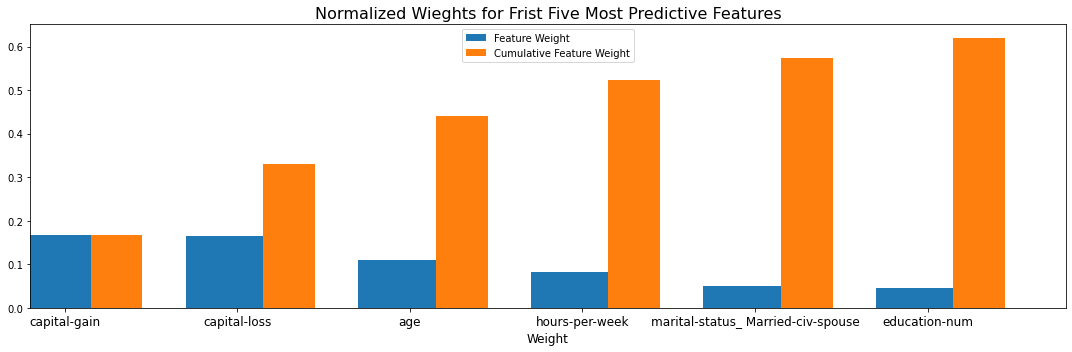

In [27]:
# Extranct feature importances
importances = best_model.feature_importances_

# plot
top_x = 6
important_columns = plot_features(importances, x_train, y_train, top_x)
display(important_columns)

### Observation about the top 5 features extraction 
1. capital-gain
2. capital-loss
  - I guess that those who can afford to invest can donate a lot.
3. age
  -  I guess that experience of how to earn relates with investing.
4. hours-per-week
  - I guess that who can use more time to invest makes more money.
5. marital-status_ Married-civ-spouse
  - I geuss that a lot of citizens with spouse can afford to pay attention not only to themselves but also to their surrounding.

### Features Selection
I will train the model with less features. The expectation is that training and prediction time is much lower.<br>
From the visualization above, I see that the top 6 most important features contributes more than half of the importance of all features present in the data.<br>
This hins that I can attempt to reduce the feature space and simplify the information required to the model to learn.

In [28]:
from sklearn.base import clone

# create reduced features ant target
x_train_reduced = x_train[important_columns]
x_test_reduced  = x_test[important_columns]

# calculate the training time of best_model
t_start = time()
best_model = best_model.fit(x_train, y_train)
training_time_best_model = time() - t_start

# clone the best model and train
light_model = clone(best_model)
t_start = time()
light_model = light_model.fit(x_train_reduced, y_train)
training_time_light_model = time() - t_start

# predict
pred_reduced = light_model.predict(x_test_reduced)

# Report the before-and-afterscores
print("------ Optimized model ------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, pred_best)))
print("F-score on testing data:        {:.4f}".format(fbeta_score(y_test, pred_best, beta = 0.5)))
print("Training Time[s]:               {:.4f}".format(training_time_best_model))
#
print("------ Optimized model on reduced data ------")
print("Accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, pred_reduced)))
print("F-score on the testing data:        {:.4f}".format(fbeta_score(y_test, pred_reduced, beta = 0.5)))
print("Training Time[s]:                   {:.4f}".format(training_time_light_model))

------ Optimized model ------
Accuracy score on testing data: 0.8690
F-score on testing data:        0.7489
Training Time[s]:               4.1480
------ Optimized model on reduced data ------
Accuracy score on the testing data: 0.8601
F-score on the testing data:        0.7318
Training Time[s]:                   0.9724


`Optimized model` used 103 features, and `optimized model on reduced data` used only 6 features. <br>
With reduced features, the F-score reduced only 1.7% and training time is about 4 time faster. <br>

### For more information about Features Selection

I will research the detail effect of the number of features which are used on training.<br>
I will show the training time, accuracy and f-score chaging the number of features from 1 to 10.

In [29]:
indices = np.argsort(importances)[::-1]
all_columns_sorted = x_train.columns.values[indices]

train_time_list = []
accuracy_list   = []
fscore_list     = []

for cnt in range(10):
    top_x = cnt + 1
    important_columns = all_columns_sorted[:top_x]
    #--------------------------#
    # create reduced features ant target
    x_train_reduced = x_train[important_columns]
    x_test_reduced  = x_test[important_columns]

    # clone the best model and train
    light_model = clone(best_model)
    t_start     = time()
    light_model = light_model.fit(x_train_reduced, y_train)
    t_end       = time()

    # predict
    pred_reduced = light_model.predict(x_test_reduced)    
    
    # output
    train_time_list.append(t_end-t_start)
    accuracy_list.append(accuracy_score(y_test, pred_reduced))
    fscore_list.append(fbeta_score(y_test, pred_reduced, beta = 0.5))

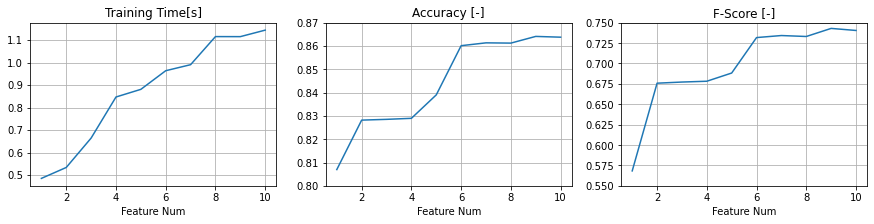

In [30]:
fig = pl.figure(figsize=(15,3))
x_data = np.arange(10) + 1

ax = fig.add_subplot(1,3,1)
pl.plot(x_data, train_time_list)
pl.grid(1)
pl.title('Training Time[s]')
pl.xlabel('Feature Num')

ax = fig.add_subplot(1,3,2)
pl.plot(x_data, accuracy_list)
pl.grid(1)
pl.title('Accuracy [-]')
pl.xlabel('Feature Num')
pl.ylim((0.8, 0.87));

ax = fig.add_subplot(1,3,3)
pl.plot(x_data, fscore_list)
pl.grid(1)
pl.title('F-Score [-]')
pl.xlabel('Feature Num')
pl.ylim((0.55, 0.75));

In [33]:
# Save to .html
!!jupyter nbconvert --to html Proj_01_Finding_Donors.ipynb

['[NbConvertApp] Converting notebook Proj_01_Finding_Donors.ipynb to html',
 '[NbConvertApp] Writing 887304 bytes to Proj_01_Finding_Donors.html']